In [1]:
#################################################################################
# This tuitoral performs basic data processing and data analysis for dataset using seurat
# refer to https://satijalab.org/seurat/ Vignette "Guided tutorial"
# Please modify this script to apply for specific dataset.
# Usage: Rscript HCA-d_data_processing_seurat.r datasetName dataFormat
# Usage example: Rscript HCA-d_data_processing_seurat.r spleen_spleen_Madissoon2019 10X
#################################################################################

In [1]:
datasetName = 'Thymus_Thymus_HCLFetal-Thymus2'
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)
setwd("/data1/ljq/jupyter_code/bhyhcad/bhyhcad/hcl_all/Thymus_Thymus_HCLFetal-Thymus2")
library(Seurat)
library(data.table)
library(ggplot2)
#library(flexclust)
#install.packages('flexclust')

In [2]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"), h = T, row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tar.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

In [3]:
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


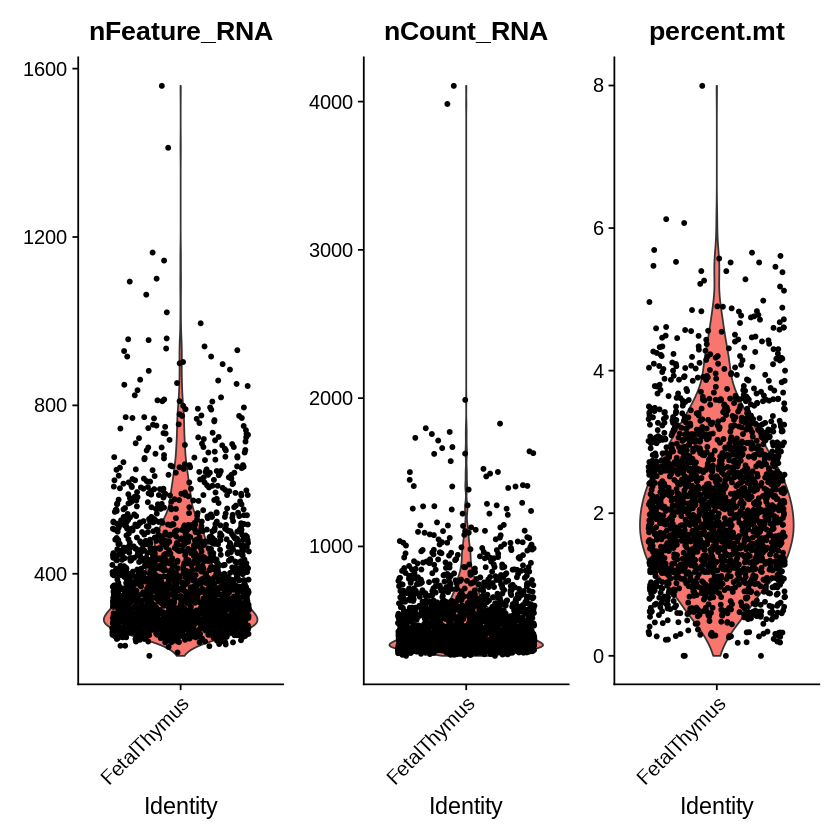

In [4]:
# Visualize QC metrics as a violin plot
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

## 下面要调

In [5]:
# Pre-processing
min.cells = 3
min.features = 0
nFeature_RNA_range = c(20, 3000)
percent.mt.thre = 20

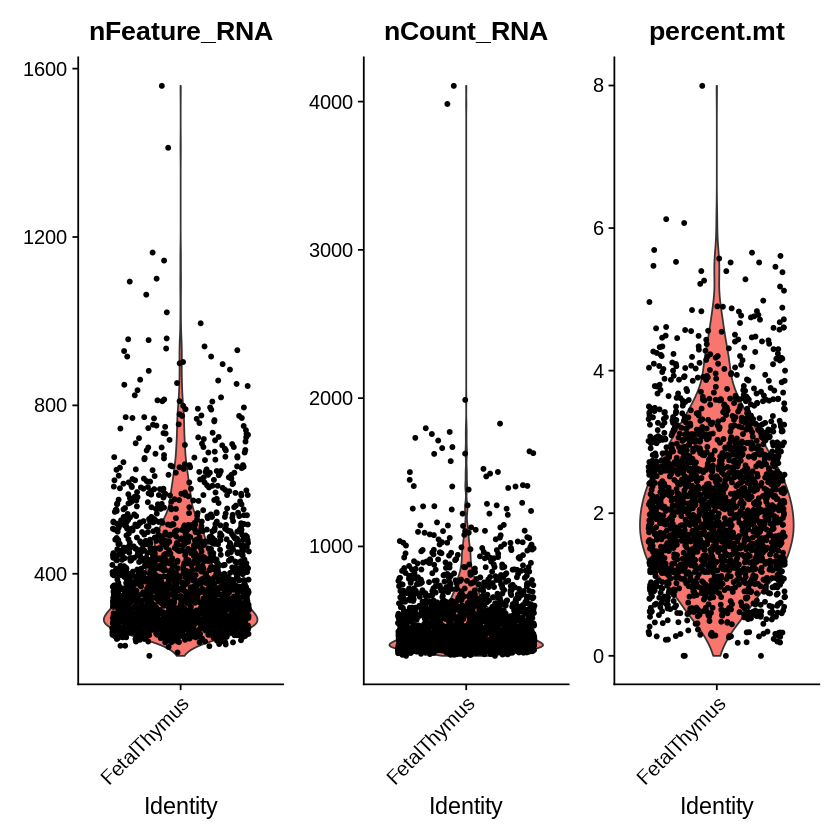

In [6]:
# QC
#dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)
# Visualize QC metrics as a violin plot
VlnPlot(dataobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)#+scale_color_npg() 不起作用

In [7]:
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -3.3339”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.49546”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  3.7128e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”
Centering and scaling data matrix



In [8]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj))
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj) 
dev.off()


PC_ 1 
Positive:  RPS27, MT-CO3, RPL7, RPLP1, RPL21, RPL31, TMSB4X, RPS29, RPS23, MT-CO1 
	   MT-CO2, RPS27A, RPS3A, RPS14, RPS19, RPL34, RPS18, RPS6, RPL27A, PPIA 
	   PTMA, RPL32, RPL15, RPS25, RPL11, RPL23A, RPS24, RPL10, RPS17, RPL37 
Negative:  CSTA, S100A9, MNDA, CD74, TYROBP, RETN, LYZ, CST3, FCER1G, HLA-DRA 
	   GNLY, RNASE2, HLA-DPA1, S100P, LGALS1, BLZF1, S100A10, C1orf162, NKG7, S100A8 
	   HLA-DRB1, DEFA3, C1orf54, HBG1, CTSG, ID2, GZMA, MS4A3, DEFA4, PPP1R2 
PC_ 2 
Positive:  HMGB1, HMGB2, TRBC1, H2AFZ, CKS2, TUBA1B, STMN1, RP11-620J15.3, HMGN2, TRBC2 
	   HSPE1, PTMA, UQCRQ, CALM2, UQCRH, SH3TC1, PPIA, COX6C, TXN, BUB1B 
	   PPP1R1C, UBB, PBK, SRP14, HSPE1P2, LDHB, RGPD3, MALAT1, HNRNPA2B1, LSM5 
Negative:  LYZ, CSTA, RNASE2, MNDA, MPO, RETN, FCER1G, AZU1, S100A9, PRTN3 
	   DEFA4, SRGN, CD74, RNASE3, C1orf162, MS4A3, CTSG, S100A8, LGALS1, TSPO 
	   S100P, NKG7, TYROBP, CST3, S100A6, DEFA3, HLA-DRA, B2M, MIR223, S100A10 
PC_ 3 
Positive:  HBG2, HBA1, HBA2, GYPB, HBG1, GYP

png 
  2

Warning message in ElbowPlot(dataobj, 100):
“The object only has information for 50 reductions”


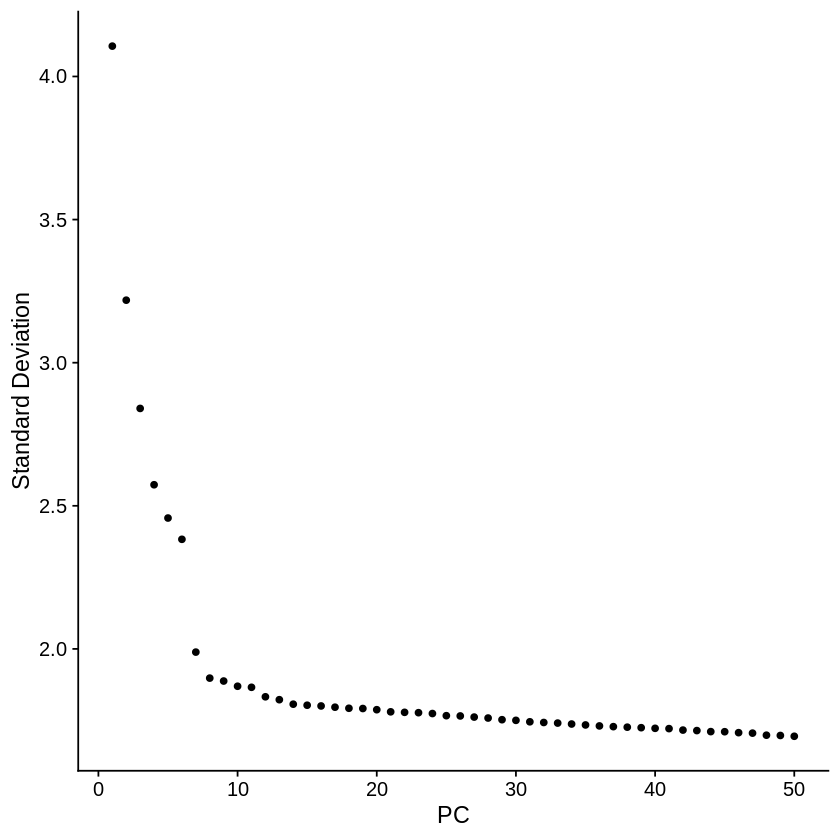

In [9]:
ElbowPlot(dataobj,100) 

## 下面要调

In [10]:
pcDim = 20
# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)
dataobj <- FindClusters(dataobj, resolution = 0.8, n.start = 10)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2068
Number of edges: 85831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6307
Number of communities: 8
Elapsed time: 0 seconds


1 singletons identified. 7 final clusters.



In [11]:
# Visulize the clustering result
dataobj <- RunUMAP(dataobj, dims = 1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
06:41:29 UMAP embedding parameters a = 0.9922 b = 1.112

06:41:29 Read 2068 rows and found 20 numeric columns

06:41:29 Using Annoy for neighbor search, n_neighbors = 30

06:41:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

06:41:29 Writing NN index file to temp file /tmp/Rtmp27PMtr/file237610acddc3

06:41:29 Searching Annoy index using 1 thread, search_k = 3000

06:41:30 Annoy recall = 100%

06:41:30 Commencing smooth kNN distance calibration using 1 thread

06:41:30 Initializing fr

In [12]:
p_umap <- DimPlot(dataobj, reduction = "umap", label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap, width = 8, height = 5)

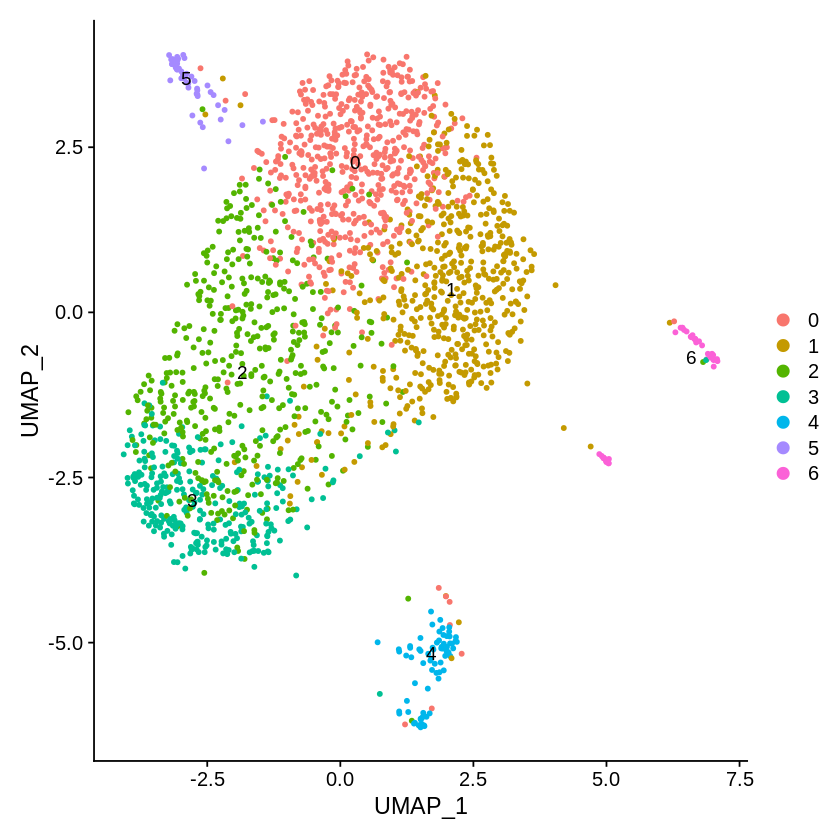

In [13]:
p_umap

In [16]:
new.cluster.ids<-c('Blood-Connective tissue-T cell-HSPE1','Unknown','Unknown','Blood-Connective tissue-T cell-CD3D','Blood-Connective tissue-Erythrocyte-AHSP','Blood-Connective tissue-Activated T cell-XCL1 XCL2','Blood-Connective tissue-Conventional dendritic cell-CD74 HLA-DRA')

In [17]:
names(new.cluster.ids) <- levels(dataobj)
dataobj <- RenameIdents(dataobj, new.cluster.ids)
hcad.label = Idents(dataobj)
dataobj <- AddMetaData(dataobj, metadata = hcad.label,col.name = 'hcad.label')

In [18]:
saveRDS(dataobj, file = paste0(datasetName,".seuratobj22.rds"))

In [35]:
target_rds = paste0('/stor/public/hcad/',datasetName,'/',datasetName,'.seuratobj.dbupload_v1.rds')

In [ ]:
saveRDS(dataobj, file = target_rds)

In [14]:
p_umap2 <- DimPlot(dataobj, reduction = "umap", label = TRUE, group.by = "cell_cluster", pt.size=1)
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height =5)

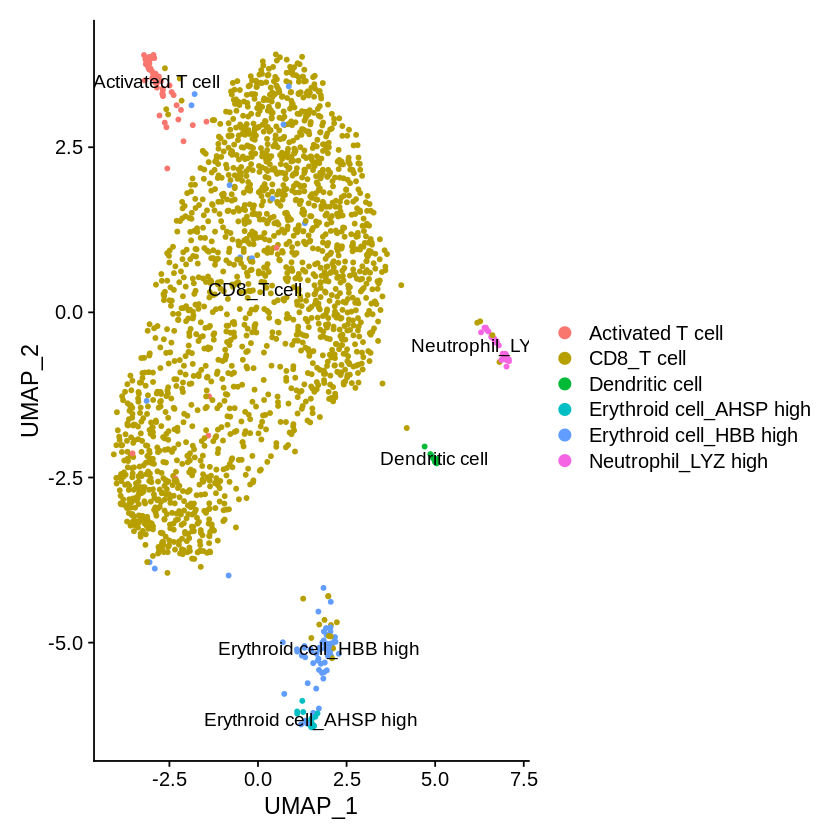

In [15]:
p_umap2

In [16]:

# Finding cluster markers 
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

